### Step to perform machine learning project
1. **Understand the problem:** Before getting the data, we need to understand the problem we are trying to solve. If you know the domain, think of which factors could play an epic role in solving the problem. If you don't know the domain, read about it. 
2. **Hypothesis Generation:** This is quite important, yet it is often forgotten. In simple words, hypothesis generation refers to creating a set of features which could influence the target variable given a confidence interval ( taken as 95% all the time). We can do this before looking at the data to avoid biased thoughts. This step often helps in creating new features. 
3. **Get Data:** Now, we download the data and look at it. Determine which features are available and which aren't, how many features we generated in hypothesis generation hit the mark, and which ones could be created. Answering these questions will set us on the right track. 
4. **Data Exploration:** We can't determine everything by just looking at the data. We need to dig deeper. This step helps us understand the nature of variables (skewed, missing, zero variance feature) so that they can be treated properly. It involves creating charts, graphs (univariate and bivariate analysis), and cross-tables to understand the behavior of features. 
5. **Data Preprocessing:** Here, we impute missing values and clean string variables (remove space, irregular tabs, data time format) and anything that shouldn't be there. This step is usually followed along with the data exploration stage. 
6. **Feature Engineering:** Now, we create and add new features to the data set. Most of the ideas for these features come during the hypothesis generation stage. 
7. **Model Training:** Using a suitable algorithm, we train the model on the given data set. 
8. **Model Evaluation:** Once the model is trained, we evaluate the model's performance using a suitable error metric. Here, we also look for variable importance, i.e., which variables have proved to be significant in determining the target variable. And, accordingly we can shortlist the best variables and train the model again. 
9. **Model Testing:** Finally, we test the model on the unseen data (test data) set.

for more rerfrence-[first_ML_end_to_ent_project_step_by](https://github.com/davidcmh/machine-learning/blob/master/boston_housing_uci/boston_housing_uci.ipynb)


## need to learn

skewness and kurtosis-[link](https://www.youtube.com/watch?v=p7WM0YKUr48)

ANOVA- like we used correlation to determine the influence of numeric features on SalePrice. Similarly, we'll use the ANOVA test to understand the correlation between categorical variables and SalePrice.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
#importing the Boston Hosuing Dataset

In [9]:
from sklearn.datasets import load_boston
boston=load_boston()
boston.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [10]:
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
print(boston.feature_names)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [12]:
dataset=pd.DataFrame(boston.data)

In [13]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
dataset.columns=boston.feature_names
dataset['price']=boston.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
print(dataset.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [17]:
print("First pass at checking target variable's distribution\n")
target = dataset.price

First pass at checking target variable's distribution



First pass at checking target variable's distribution

Skewness: 1.108098
Kurtosis: 1.495197


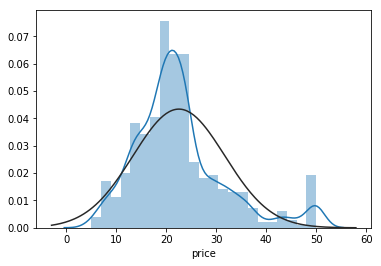

<Figure size 432x288 with 0 Axes>

In [30]:
print("First pass at checking target variable's distribution\n")

import seaborn as sns
from scipy.stats import norm
from scipy import stats

target = dataset.price


# check distribution
sns.distplot(target, fit=norm)
fig = plt.figure()
'''res = stats.probplot(target, plot=plt)'''

#skewness and kurtosis
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurt())

In [31]:
#split the dataset
X = dataset.iloc[:,:-1]

In [32]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [33]:
Y=dataset.iloc[:,-1]

In [34]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split


In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.8,random_state=0)


In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
ml=LinearRegression()
ml.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
Y_pred=ml.predict(X_test)


In [40]:
#visualinsing the training set
plt.scatter(X_train,Y_train,color='red')
plt.plot(show()



SyntaxError: unexpected EOF while parsing (<ipython-input-40-731af574de7c>, line 4)

In [44]:
import sklearn

mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

28.57551044374185


Bivariate plots of data where price != 50


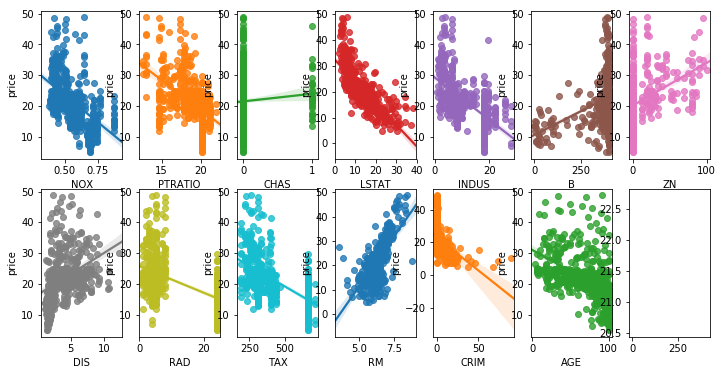

In [48]:
print("Bivariate plots of data where price != 50")
feature_cols = set(dataset.columns) - set(['price'])
df = dataset[dataset['price'] != 50]
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(12, 6))
for i, feature in enumerate(feature_cols):
    sns.regplot(x=feature, y='price', data=df, ax=axs[int(i/7), i%7])

Bivariate plots of data where price == 50


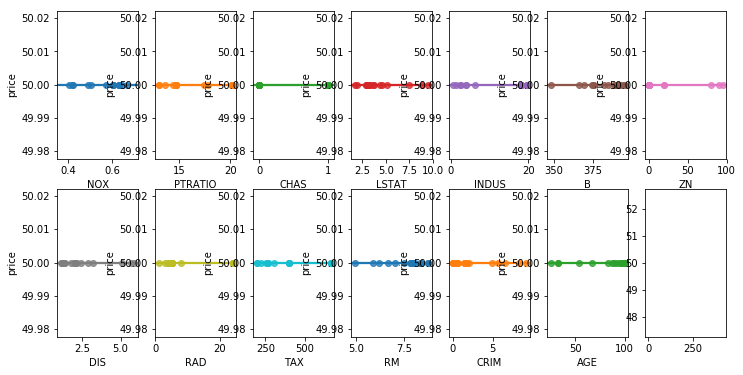

In [50]:
print("Bivariate plots of data where price == 50")
df = dataset[dataset['price'] == 50]
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(12, 6))
for i, feature in enumerate(feature_cols):
    sns.regplot(x=feature, y='price', data=df, ax=axs[int(i/7), i%7])

For data points where MEDV = 50, it appears that the values of their features are randomly distributed. None of their bivariate relationships bears resemblance to the relationships seen in the data where MEDV != 50.

This suggests that MEDV = 50 could have been an input error or just a placeholder value. Hence I will exclude them and have a second pass at target variable analysis.



### 3.2 Second pass - Remove outlier values
remove all outlier value where price =50 beacuse wuth price =50 data dont have any relationship with data

490
Skewness: 0.775660
Kurtosis: 1.049637


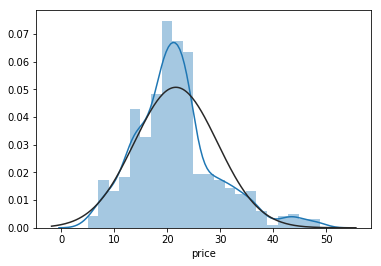

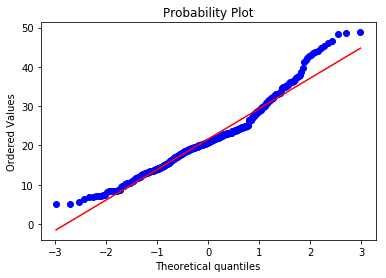

In [64]:

# check how many data points do I have
df_f = dataset[dataset['price'] != 50] 
print(len(df_f))

target = df_f['price']

# look at how these data is distributed - histogram
sns.distplot(target, fit=norm)
fig = plt.figure()
res = stats.probplot(target, plot=plt)

#skewness and kurtosis
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurt())


After removal of the data points with MEDV = 50, the target variable is 'smoother', though it suffers from heavy tails.

### 3.3 Third Pass - log-transform MEDV¶


Skewness: -0.585281
Kurtosis: 0.994297


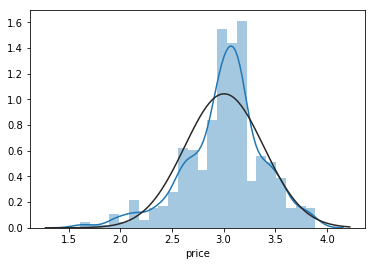

In [57]:
target_log=np.log(target)
sns.distplot(target_log,fit=norm)
#skewness and kurtosis
print("Skewness: %f" % target_log.skew())
print("Kurtosis: %f" % target_log.kurt())

### 3.2 Features analysis
#### 3.2.2 Features overview - check data types and missing values¶


In [59]:
dataset.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


no features have missing value and all are numerical value

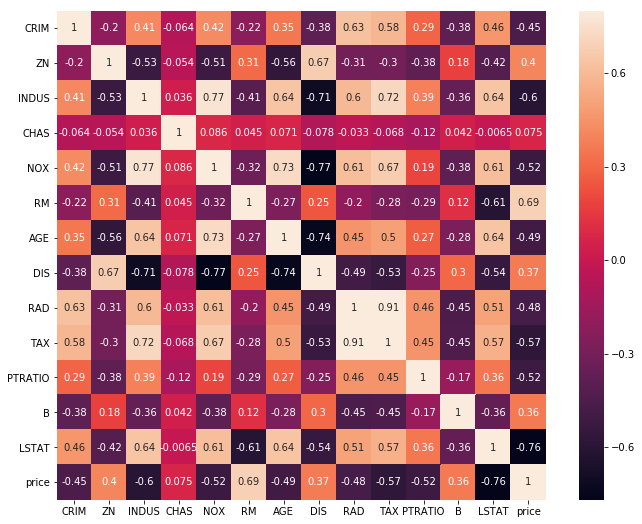

In [66]:
#correlation matrix
df = dataset[dataset['price'] != 50]
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

'RM','LSTAT','PIRATIP',TAX have more correlation with price so we are taking those features only for further use


In [95]:
df=dataset[dataset['price'] != 50]
X_new=df[['RM','LSTAT','TAX','PTRATIO']]
X_new.count()

RM         490
LSTAT      490
TAX        490
PTRATIO    490
dtype: int64

In [96]:
Y_new=df.iloc[:,-1]

In [97]:
Y_new.max()

48.8

In [99]:
X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y_new,test_size=0.8,random_state=0)